# 3S Exomiser performance evaluation

This notebook plots comparison of Exomiser performance with or without 3S module. The performance is evaluated on ~500 cases.


In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

from curation import group_pathomechanism_for_threes_evaluation, load_data, plot_multicolor

sns.set_style('whitegrid')

#data_dir = "/Users/danisd/data/threes-simulations"
data_dir = "/home/ielis/data/threes-simulations"

There were multiple rows of evaluation:
- [First](#20190711)
- [Second](#20190812)

## 20190711

## Read simulations output

Read the `ranks.tsv` file.

### Melt the rows with multiple `PATHOMECHANISM` entries
Some lines represent cases where variants with multiple pathomechanisms were present. 

E.g.: `PMID:24704046-Mattioli-2014-FANCA-proband_II-1	1	1	splicing|3ss|disrupted;splicing|SRE`

We split such line into two lines where value from `PATHOMECHANISM` column is distributed into two rows. Other values stay the same.

### Remove lines representing non-splicing pathomechanisms

Lines with pathomechanism such as `coding|missense` are removed.

In [2]:
version = "20190711"
FPATH = "{0}/{1}-output-checked/{1}-ranks.tsv".format(data_dir, version)
df20190711 = load_data(FPATH)

ho = np.sort(df20190711['PATHOGRP'].unique())
df20190711.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP
0,PMID:11828341-Ishii-2002-GLA-proband_1,-1,-1,splicing|SRE|ESS|binding|decreased,SRE
1,PMID:28679633-Ito-2017-MYBPC3-VARIANT407-5C>T,90,10,splicing|3ss|disrupted,3ss|disrupted
2,PMID:23606313-Fan-2013-TAZ-proband,1,1,splicing|5css|activated,5css|activated
3,PMID:8878424-Jin-1996-ITGB3-RS,1,1,splicing|5ss|disrupted,5ss|disrupted
4,PMID:10330348-Teraoka-1999-ATM-AT51LA,1,1,splicing|5ss|disrupted,5ss|disrupted


## Which pathomechanisms are being discovered?

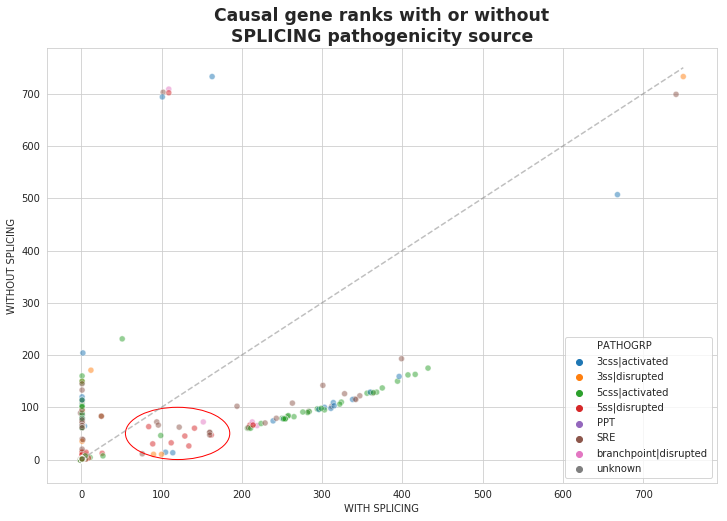

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_multicolor(df20190711.WITH_SPLICING, df20190711.WITHOUT_SPLICING, df20190711.PATHOGRP, ho, ax=ax)

e20190711 = Ellipse((120, 50), width=130, height=100, facecolor='none', edgecolor="red")
k = ax.add_patch(e20190711)

**Interpretation**

The red ellipse denotes cases where the SPLICING score was more like a burden than like an asset. These cases were looked at and fixed, whenever it was possible.

Some cases lacked a good phenotype terms resulting in low Phenotype Score. The other cases lacked the second variant required for correct identification of COMPHET inheritance.

After fixing these issues, the analysis was run again producing the dataset denoted as *20190812*. The new dataset is analyzed below.

## 20190812

The second round of evaluation on adjusted phenopackets.

### Cases where Exomiser performed better _without_ SPLICING score

In [4]:
version = "20190812"
where_to_save = "{0}/{1}-output-checked/{1}-to_improve.tsv".format(data_dir, version)
df20190711.loc[(df20190711.WITH_SPLICING > 50) & (df20190711.WITH_SPLICING < 200), :].to_csv(where_to_save, sep="\t")

Analysis was done here, Exomiser was run again, either using or not using the `SPLICING` score. Results were written to `20190812-ranks.tsv` file.

In [5]:
FPATH = "{0}/{1}-output-checked/{1}-ranks.tsv".format(data_dir, version)
df20190812 = load_data(FPATH)

ho = np.sort(df20190812['PATHOGRP'].unique())
df20190812.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP
0,PMID:23239986-Wappenschmidt-2012-BRCA-09_3943-001,-1,-1,splicing|5ss|disrupted,5ss|disrupted
1,PMID:24342716-Kirwin-2014-TAZ-4,1,1,splicing|5ss|disrupted,5ss|disrupted
2,PMID:28507310-Pousada-2017-BMPR2-VARIANT412C>G,1,1,splicing|5css|activated,5css|activated
3,PMID:28679633-Ito-2017-LMNA-VARIANT1146C>T,1,79,splicing|5css|activated,5css|activated
4,PMID:18511318-Fukao-2008-ACAT1-GK43,27,7,splicing|5css|activated,5css|activated


## Which pathomechanisms are being discovered?

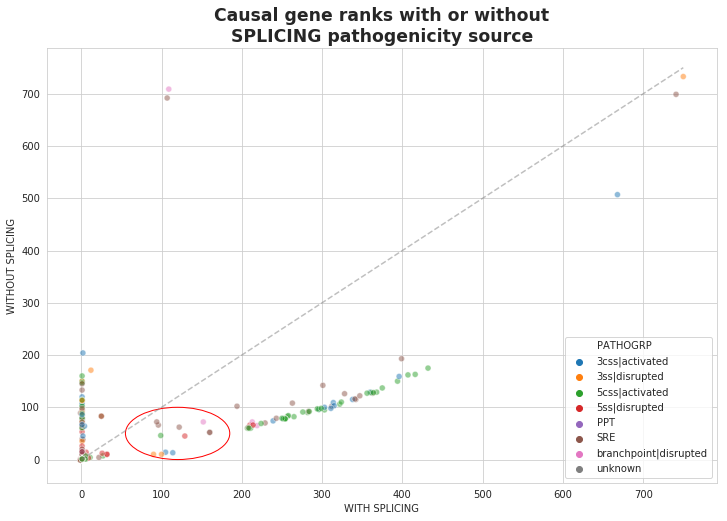

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_multicolor(df20190812.WITH_SPLICING, df20190812.WITHOUT_SPLICING, df20190812.PATHOGRP, ho, ax=ax)

e20190711 = Ellipse((120, 50), width=130, height=100, facecolor='none', edgecolor="red")
k = ax.add_patch(e20190711)

## Comparison of 20190711 and 20190812


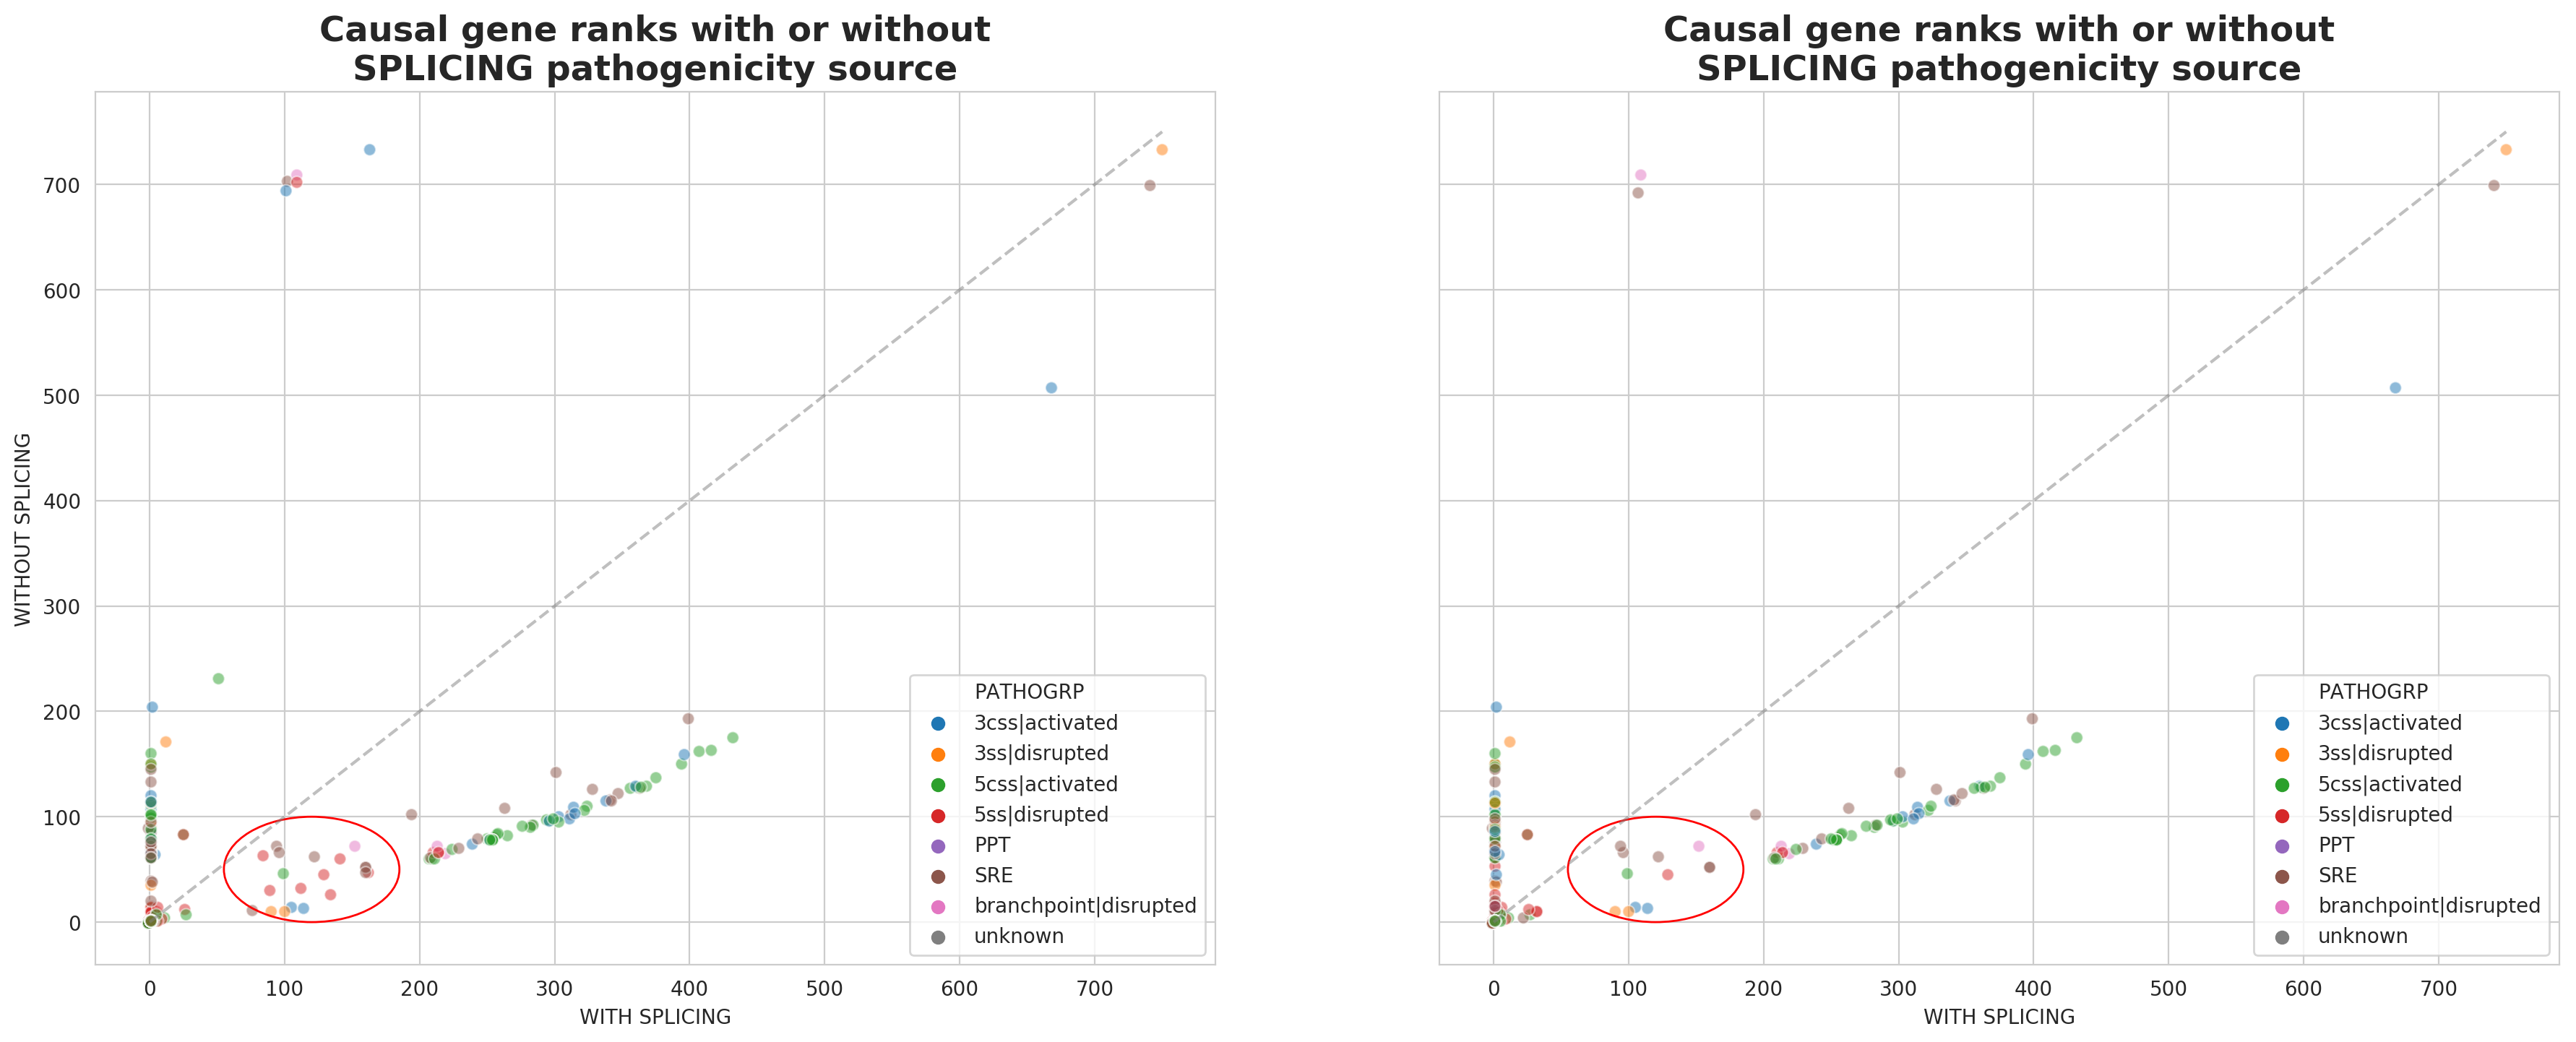

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8), dpi=200, sharey=True)
plot_multicolor(df20190711.WITH_SPLICING, df20190711.WITHOUT_SPLICING, df20190711.PATHOGRP, ho, ax=ax[0])
plot_multicolor(df20190812.WITH_SPLICING, df20190812.WITHOUT_SPLICING, df20190812.PATHOGRP, ho, ax=ax[1])

e20190711 = Ellipse((120, 50), width=130, height=100, facecolor='none', edgecolor="red")
ax[0].add_patch(e20190711);

# the same ellipse but for different plot
e20190812 = Ellipse((120, 50), width=130, height=100, facecolor='none', edgecolor="red")
ax[1].add_patch(e20190812);

**Interpretation**

There are more cases under the line and between `50 <--> 200` on *WITH SPLICING* axis on the left plot. Adding the 2nd variant in COMPHET cases, and addidtional HP terms in other cases obviously helped.

Most of the cases from the ellipse has moved into rank ~1, which is the expected behaviour. The rest of the cases cannot be improved at the moment.

## 20190813

Take a look at the cases further up along the `WITH SPLICING` axis (denoted as <span style="color:blue">blue ellipse</span>).

We will denote this dataset as **20190813**.

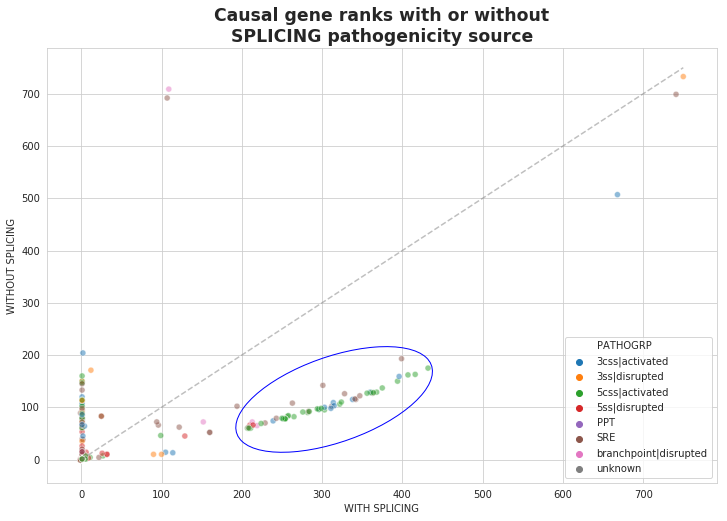

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_multicolor(df20190812.WITH_SPLICING, df20190812.WITHOUT_SPLICING, df20190812.PATHOGRP, ho, ax=ax)

e20190711 = Ellipse((315, 115), width=280, height=150, angle=35, facecolor='none', edgecolor="blue")
k = ax.add_patch(e20190711)

## Cases where Exomiser performed better _without_ SPLICING score

In [9]:
version = "20190813"
os.makedirs("{0}/{1}-output-checked".format(data_dir, version), exist_ok=True)

where_to_save = "{0}/{1}-output-checked/{1}-to_improve.tsv".format(data_dir, version)
df20190812.loc[(df20190812.WITH_SPLICING > 200) & (df20190812.WITH_SPLICING < 450), :].to_csv(where_to_save, sep="\t", index=False)

## TODO - do analysis

- if we can do anything with variants where most of the variants lead to activation of CSS. These variants might be too far in intron.
- if we can do anything with the variants with rank **-1**